Step 1 | Data Pre-Processing

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the dataset

In [19]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [20]:
df.drop(df[['Gender', 'User ID']], axis=1, inplace=True)

In [21]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [22]:
X = df.iloc[:, [0, 1]].values #fts
y = df.iloc[:, -1].values
y.shape

(400,)

Splitting the dataset into the Training set and Test set

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.20, random_state=0)

Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#X_train

Step 2 | Logistic Regression Model

In [59]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, Y_train)

LogisticRegression()

In [60]:
y_pred  =  log.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

Fitting Logistic Regression to the Training set

Step 3 | Predection

In [61]:
print(log.predict([[0, 0]]))

[0]


Step 4 | Evaluating The Predection

In [62]:
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
print("accuracy_score : ",accuracy_score(Y_test, y_pred))
print("f1_score : ",f1_score(Y_test, y_pred))
y_score1 = log.predict_proba(X_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, y_score1)
print('roc_auc_score for logistic_regression: ', roc_auc_score(Y_test, y_score1))

accuracy_score :  0.925
f1_score :  0.85
roc_auc_score for logistic_regression:  0.9764890282131661


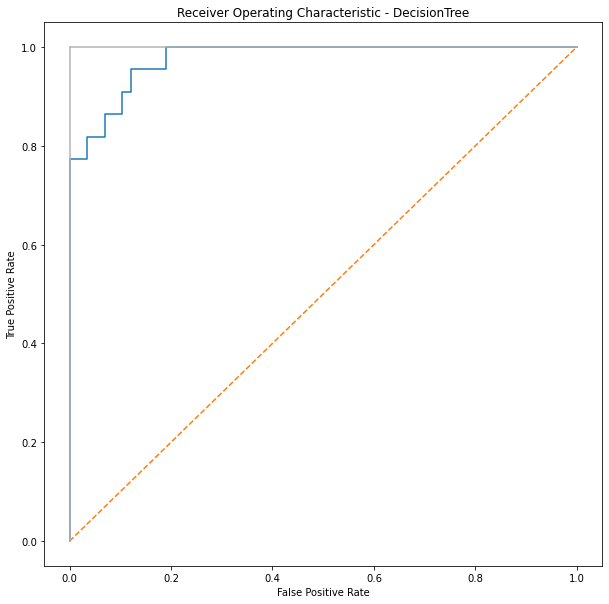

In [63]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - logistic_regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Making the Confusion Matrix

In [64]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(Y_test,y_pred)
con_matrix

array([[57,  1],
       [ 5, 17]], dtype=int64)

Visualization

<AxesSubplot:>

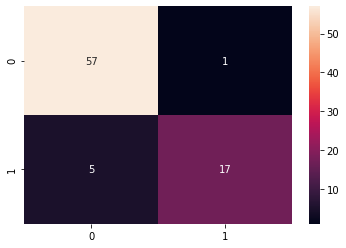

In [65]:
import seaborn as sns
sns.heatmap(con_matrix, annot=True)